<a href="https://colab.research.google.com/github/aflores/colab-notebooks/blob/master/ml_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering

Using the popular penguins dataset to explore Nearest-K clustering

In [ ]:
%%writefile requirements.txt
ydata-profiling


Writing requirements.txt


In [ ]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.3/352.3 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 64.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=22ba72672be59ea94b62c27f892204885457ea073afeb3f3b2b67ba04a86f804
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# metrics
from sklearn.metrics import confusion_matrix

# data prep - scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# k-means
from sklearn.cluster import KMeans


sns.set(style="whitegrid", font_scale=1.75)
# set the figure size using rcParams
plt.rcParams['figure.figsize'] = [12, 6]

pd_default_format = pd.options.display.float_format
pd.options.display.float_format = '{:.4f}'.format


from ydata_profiling import ProfileReport

In [ ]:
raw_penguins = pd.read_csv('https://aka.ms/penguin-data')

In [ ]:
raw_penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CulmenLength   342 non-null    float64
 1   CulmenDepth    342 non-null    float64
 2   FlipperLength  342 non-null    float64
 3   BodyMass       342 non-null    float64
 4   Species        344 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 13.6 KB


In [ ]:
raw_penguins.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CulmenLength,342.00,43.92,5.46,32.10,39.23,44.45,48.50,59.60
CulmenDepth,342.00,17.15,1.97,13.10,15.60,17.30,18.70,21.50
FlipperLength,342.00,200.92,14.06,172.00,190.00,197.00,213.00,231.00
BodyMass,342.00,4201.75,801.95,2700.00,3550.00,4050.00,4750.00,6300.00
Species,344.00,0.76,0.76,0.00,0.00,1.00,1.00,2.00


In [ ]:
print(f"{'-' * 40}\nLook for nulls\nThis information is also in the Missing Values tab of the Profile Report\n{'-' * 40}")
raw_penguins.isna().sum()

----------------------------------------
Look for nulls
This information is also in the Missing Values tab of the Profile Report
----------------------------------------


CulmenLength     2
CulmenDepth      2
FlipperLength    2
BodyMass         2
Species          0
dtype: int64

# Exploratory Data Analysis

## Using Y-Data Profiler

In [ ]:
# Prepare the profiling report
# this might take a couple of minutes
profile = ProfileReport(raw_penguins, title="Penguins Profiling Report")

In [ ]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df_penguins = raw_penguins.dropna()
df_penguins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CulmenLength   342 non-null    float64
 1   CulmenDepth    342 non-null    float64
 2   FlipperLength  342 non-null    float64
 3   BodyMass       342 non-null    float64
 4   Species        342 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 16.0 KB


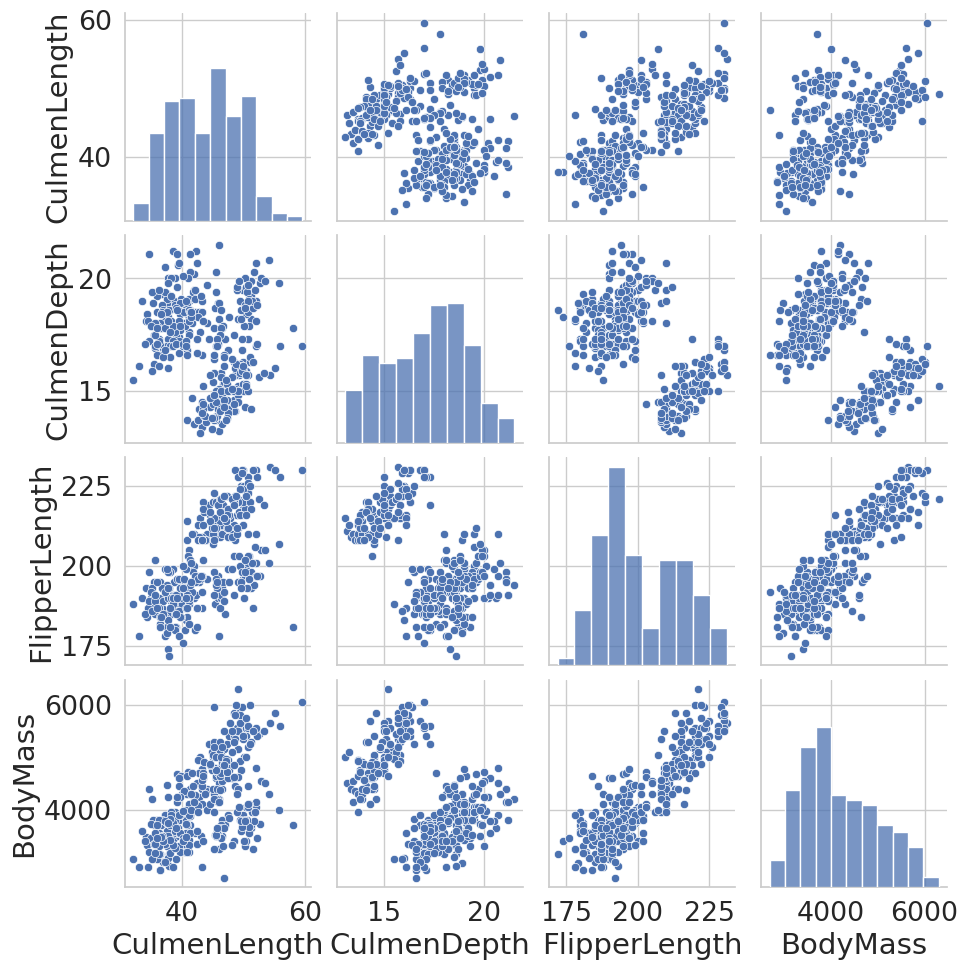

In [ ]:
sns.pairplot(df_penguins[['CulmenLength', 'CulmenDepth', 'FlipperLength', 'BodyMass']])

In [ ]:
df_penguins['index_col'] = df_penguins.index

<ipython-input-12-a7781b96dd89>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_penguins['index_col'] = df_penguins.index


In [ ]:
df_penguins.head()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species,index_col
0,39.10,18.70,181.00,3750.00,0,0
1,39.50,17.40,186.00,3800.00,0,1
2,40.30,18.00,195.00,3250.00,0,2
4,36.70,19.30,193.00,3450.00,0,4
5,39.30,20.60,190.00,3650.00,0,5


In [ ]:
# NORMALIZE
cols_to_scale = ['CulmenLength', 'CulmenDepth', 'FlipperLength', 'BodyMass']

# make a copy of the original data
penguins_scaled = df_penguins.copy()

penguins_scaled[cols_to_scale] = scaler.fit_transform(df_penguins[cols_to_scale])

#pd.options.display.float_format = pd_default_format
penguins_scaled[cols_to_scale].describe()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass
count,342.0000,342.0000,342.0000,342.0000
mean,0.0000,0.0000,-0.0000,0.0000
std,1.0015,1.0015,1.0015,1.0015
min,-2.1685,-2.0544,-2.0593,-1.8754
25%,-0.8616,-0.7866,-0.7774,-0.8139
50%,0.0969,0.0755,-0.2788,-0.1895
75%,0.8398,0.7854,0.8607,0.6846
max,2.8759,2.2054,2.1426,2.6202


In [ ]:
# Model Calculate K-means
n_clusters=3
random_state=42

# model parameters
model = KMeans(n_clusters=n_clusters, random_state=random_state)

# create model
model.fit(penguins_scaled[cols_to_scale])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [ ]:
# Group data points into clusters and add a column with cluster identifier
penguins_scaled['Cluster'] = model.predict(penguins_scaled[cols_to_scale])
penguins_scaled[['Species','Cluster']].value_counts()

Species  Cluster
0        2          127
1        1          123
2        0           63
0        0           24
2        2            5
dtype: int64

In [ ]:
penguins_scaled[['index_col','Cluster','Species']]

,index_col,Cluster,Species
0,0,2,0
1,1,2,0
2,2,2,0
4,4,2,0
5,5,2,0
...,...,...,...
339,339,0,2
340,340,0,2
341,341,0,2
342,342,0,2


<Axes: >

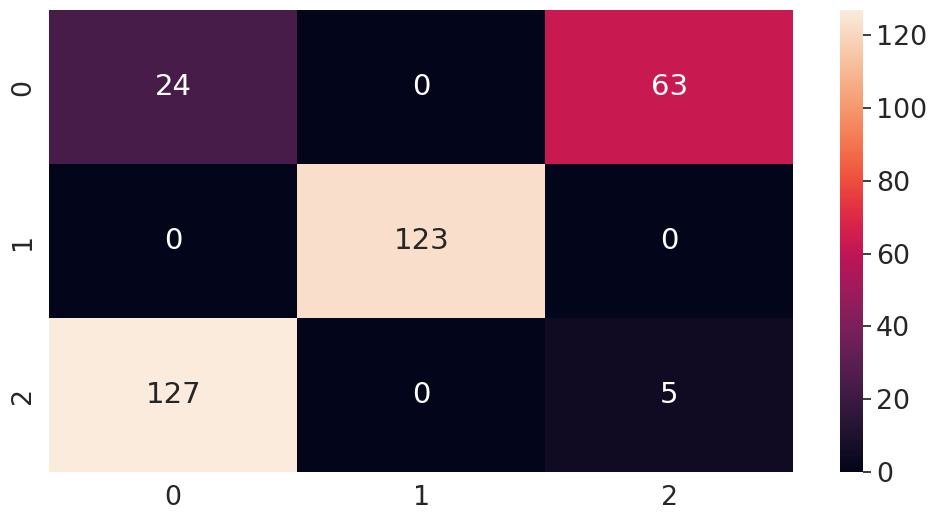

In [ ]:
# Create the confusion matrix
cf_matrix = confusion_matrix(penguins_scaled['Cluster'], penguins_scaled['Species'])

# Plot the confusion matrix
sns.heatmap(cf_matrix, annot=True, fmt='g')